# Mehrklassenklassifikation

In der Hausaufgabe 1 habt ihr eine Klassifikationspipeline für 6-10 Klassen des **InVar-100** Datensatzes aufgebaut und eure Ergebnisse evaluiert.

In der heutigen Übung macht ihr euch die **Keras**-Bibliothek (Keras Deep Learning Framework) zunutze, um die Klassifikation ohne explizite Merkmalsextraktion durchzuführen.


## Aufgabe 1
### Kennenlernen der Modellentwicklung mit Keras Framework

In dieser Aufgabe machen wir uns die [Tensorflow-Open-Source-Plattform](https://www.tensorflow.org) für maschinelles Lernen zunutze, um die Klassifikation durchzuführen.

Wir werden mit der benutzerfreundlichen sequentiellen Keras-API arbeiten.

Die **Tensorflow-Tutorials für Anfänger** https://www.tensorflow.org/tutorials?hl=de könnt ihr als Einstieg in die Keras Grundlagen nutzen.

Das Ziel ist, dass ihr euch mit den **4 Schritten einer Modellentwicklung mit Keras** vertraut macht:

1. Aufbau eines Modells
2. Kompilieren eines Modells
3. Training eines Modells
4. Evaluation des trainierten Modells


Folgende Fragen solltet ihr dabei beantwortet haben:
- Wie erfolgt die Datenaufbereitung („Loading & Preprocessing“)?
- Was ist ein Layer?
- Welche Modelltypen bietet Keras an?
- Was ist ein Sequential model?
- Wofür werden folgende Befehle / Funktionen benutzt, welche Parameter müssen für die Verwendung dieser Befehle in Abhängigkeit von der Aufgabenstellung und den verwendeten Daten festgelegt werden:
    - Model()
    - Sequential()
    - keras.layers.Dense()
    - add()
    - compile()
    - fit()
    - evaluate()
    - predict()
    
Als Informationsquelle bietet sich auch https://keras.io/ an. Gerne könnt ihr euch alles anschauen, fokussiert euch in diesem Schritt primär auf die Grundlagen:
- https://keras.io/about/
- https://keras.io/getting_started/intro_to_keras_for_engineers/
- https://keras.io/guides/sequential_model/
- https://keras.io/guides/training_with_built_in_methods/

Ich werde diese Aufgabe mit euch in der Übung gemeinsam duchgehen und die einzelnen Schritte erläutern.

Ihr könnt euch aber auch selbstständig den ersten Überblick verschaffen.

## Aufgabe 2
### Klassifikation mit einem ConvNet-Modell

In dieser Aufgabe werdet ihr eine andere Netzarchitektur – Convolutional Neural Networks (ConvNets) – kennenlernen. Diese Netzarchitektur wurde speziell für die Verarbeitung von Bildern konzipiert. Zusätzlich zu den Dense-Layers, die für die Klassifikationsaufgabe zuständig sind, kommen zwei weitere ConvNets Layer-Typen, die die Merkmalsextraktionsaufgabe übernehmen. Das sind Convolutional Layers und Pooling Layers.


Eure Aufgabe besteht darin, ein simples ConvNet-Klassifikationsmodell zu implementieren, zu trainieren und zu testen.

Ihr werdet einen **Subset aus dem Industrial 100** Datensatz verwenden. Der Subset enthält die ersten 15 Klassen des Datensatzes. Eine Übersicht über alle ClassIDs und deren Bezeichnungen findet ihr in der csv-Datei Industrial100-labels.csv.
Den Datensatz könnt ihr (wenn noch nicht gemacht) von der tubCloud herunterladen und in den BGA2-Ordner ablegen (oder auf eurem eigenen Rechner). Anbei der Link zum Datensatz: https://tubcloud.tu-berlin.de/s/gWkS6eyoFemMXGz

Diese Aufgabe könnt ihr angelehnt an die Schritte der Modellentwicklung mit Keras in folgende Teilaufgaben unterteilen:
1. Datenaufbereitung
2. Aufbau des Modells
3. Kompilieren des Modells
4. Training des Modells
5. Evaluation des trainierten Modells
6. Speichern des Modells
7. Verwendung des gespeicherten Modells zur Klassifikation eigener Beispielbilder

Zur optimalen Nutzung des Arbeitsspeichers deines Rechners kannst du zum Laden von Daten die Funktion [image_dataset_from_directory](https://keras.io/api/preprocessing/image/#image_dataset_from_directory-function)  nutzen.

Alternative [Moeglichkeiten](https://keras.io/api/preprocessing/image/):

- ImageDataGenerator + flow_from_directory()
- ImageDataGenerator + flow_from_dataframe()
- load_img()
- img_to_array()

### Beispiel mit Hinweisen zu den einzelnen Schritten

https://www.tensorflow.org/tutorials/images/classification


## Imports
TO DOs: Schaut euch bitte die die im Ordner UE1-Aufgaben abgelegte [Dokumentation](https://isis.tu-berlin.de/pluginfile.php/3154242/mod_folder/content/0/220621_Google_Colab_Einführung.pdf?forcedownload=1) mit den Hinweisen zu Google [Colab](https://medium.com/tensorflow/colab-an-easy-way-to-learn-and-use-tensorflow-d74d1686e309).
Wir werden diese Umgebung für die Übung 4 und 5 nutzen.


In [1]:

import tensorflow as tf
from tensorflow import data as tf_data
from tensorflow import keras
from tensorflow.keras import layers, models
from tensorflow.keras.preprocessing.image import ImageDataGenerator, load_img, img_to_array
from tensorflow.keras.utils import image_dataset_from_directory

In [2]:
import os
import cv2
import numpy as np
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import pandas as pd

from skimage.io import imread
from skimage import color, io
from skimage.transform import resize
from skimage.feature import hog, sift
from skimage import exposure

from sklearn import decomposition
from sklearn.decomposition import PCA
from sklearn.model_selection import learning_curve, train_test_split, ShuffleSplit
from sklearn.metrics import confusion_matrix, f1_score, accuracy_score, ConfusionMatrixDisplay
from sklearn.metrics import recall_score, precision_score, precision_recall_curve
from sklearn.metrics import classification_report, accuracy_score
from sklearn.preprocessing import StandardScaler

from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC

from mpl_toolkits.mplot3d import Axes3D

from ipywidgets import interact, interactive, fixed, interact_manual, widgets

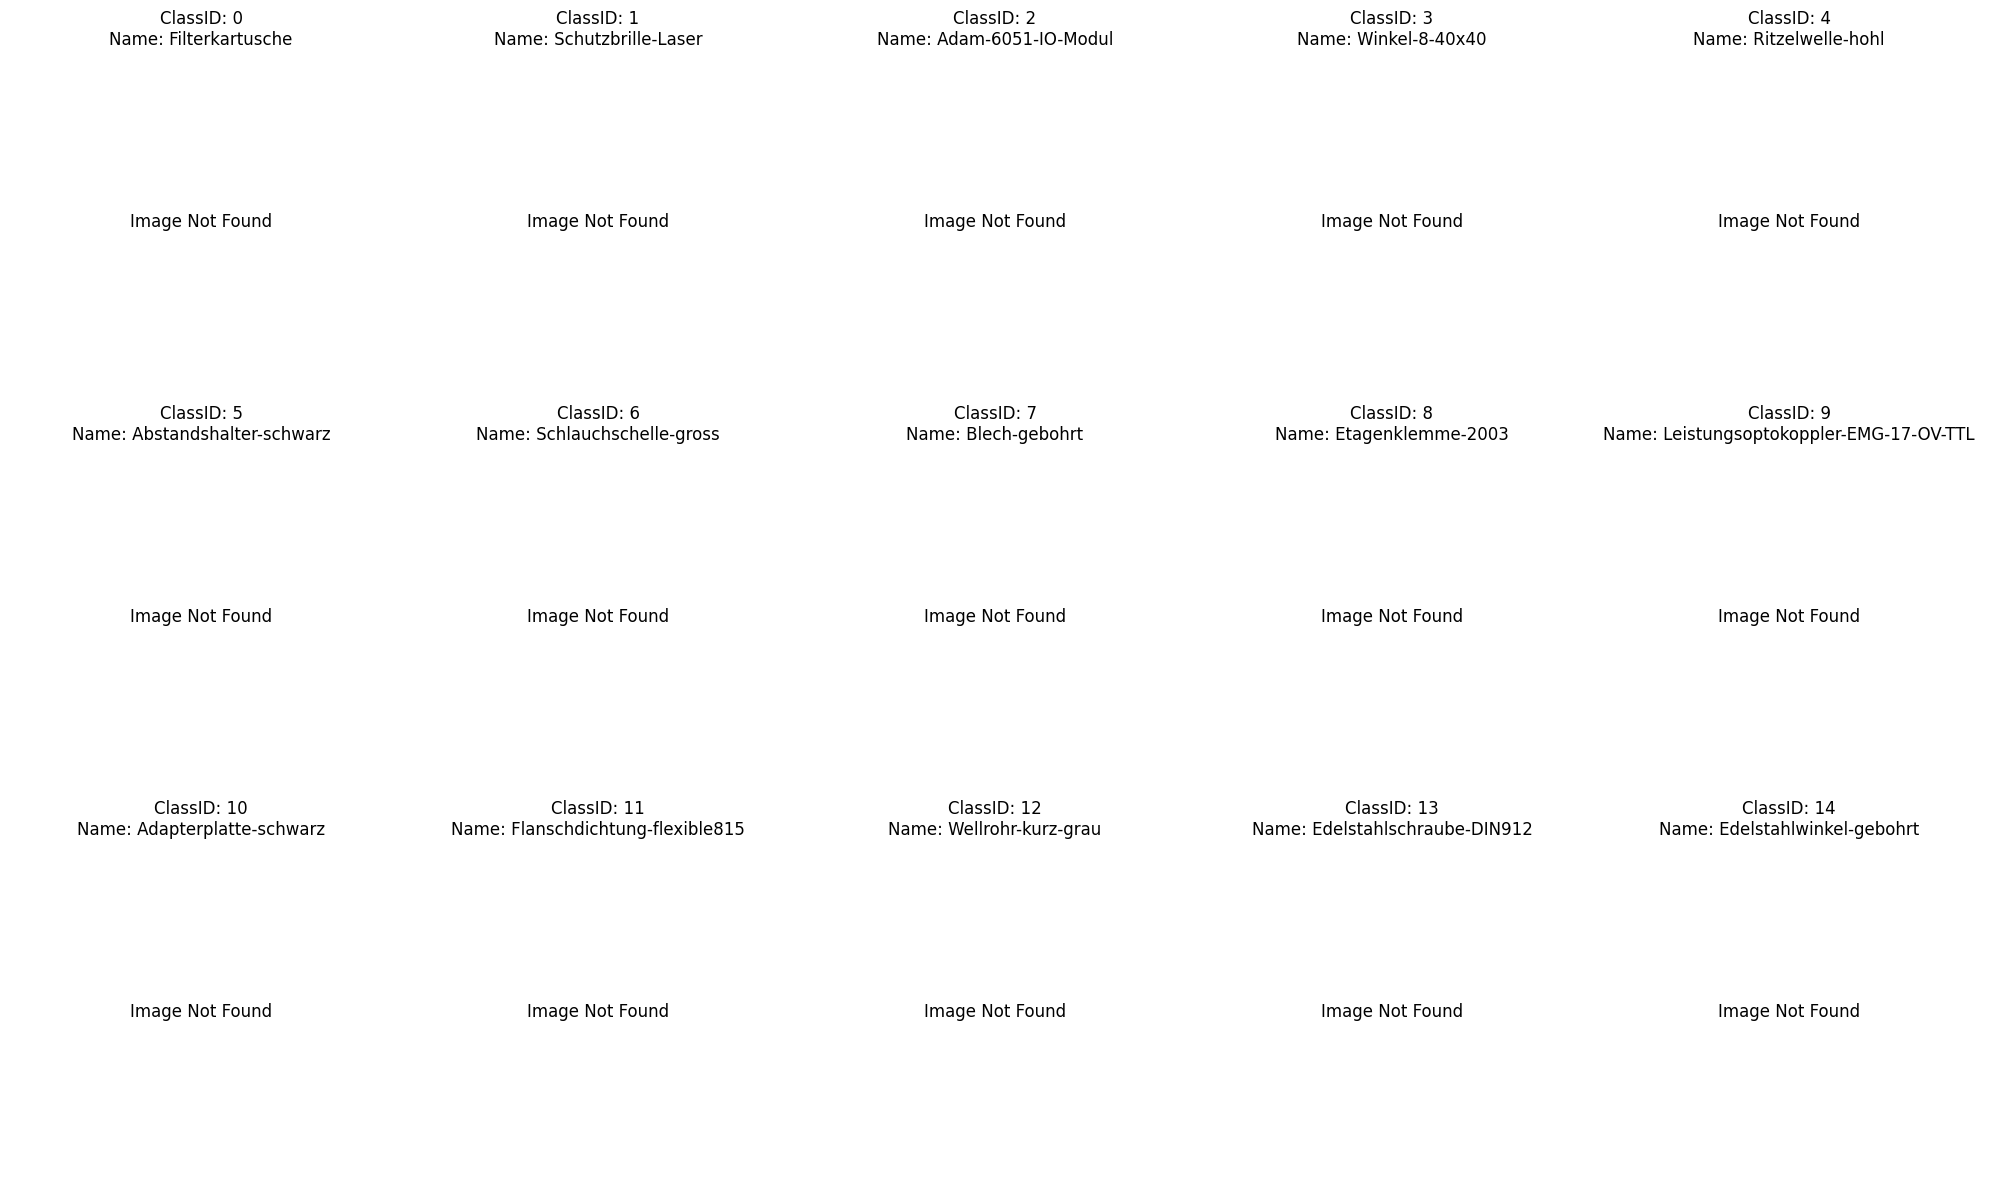

In [3]:
data = pd.read_csv("E:\\lernen\\TUB\\ss2024\\aBGA2\\SUBSET_Industrial_100_dataset\\SUBSET_Industrial_100\\Industrial100-labels.csv", header=None, names=["ClassID", "ClassName"])

top_15_classes = data.head(15)

class_ids = top_15_classes["ClassID"].tolist()
class_names = top_15_classes["ClassName"].tolist()

fig, axes = plt.subplots(3, 5, figsize=(20, 12))
axes = axes.flatten()

for ax, class_id, class_name in zip(axes, class_ids, class_names):
        folder_path = os.path.join('/content/drive/MyDrive/data_aBGA/SUBSET_Industrial_100',str(class_id))
        try:
            img_filename = os.listdir(folder_path)[0]
            img_path = os.path.join(folder_path, img_filename)
            img = mpimg.imread(img_path)
            height, width, channels = img.shape

            print(f"Width: {width}, Height: {height}")
            ax.imshow(img)
            ax.set_title(f'ClassID: {class_id}\nName: {class_name}', fontsize=12)
            ax.axis('off')
        except (FileNotFoundError, IndexError):
            ax.text(0.5, 0.5, 'Image Not Found', ha='center', va='center', fontsize=12)
            ax.set_title(f'ClassID: {class_id}\nName: {class_name}', fontsize=12)
            ax.axis('off')

plt.tight_layout()
plt.show()

Generate a Dataset

In [4]:
image_size = (180, 180)
batch_size = 64

train_ds, val_ds = keras.utils.image_dataset_from_directory(
    "E:\\lernen\\TUB\\ss2024\\aBGA2\\SUBSET_Industrial_100_dataset\\SUBSET_Industrial_100",
    validation_split=0.2,
    subset="both",
    seed=1337,
    image_size=image_size,
    batch_size=batch_size,
)

Found 780 files belonging to 15 classes.
Using 624 files for training.
Using 156 files for validation.


Using image data augmentation

In [5]:
data_augmentation_layers = [
    layers.RandomFlip("horizontal"),
    layers.RandomRotation(0.1),
]


def data_augmentation(images):
    for layer in data_augmentation_layers:
        images = layer(images)
    return images

In [6]:
# Apply `data_augmentation` to the training images.
train_ds = train_ds.map(
    lambda img, label: (data_augmentation(img), label),
    num_parallel_calls=tf_data.AUTOTUNE,
)
# Prefetching samples in GPU memory helps maximize GPU utilization.
train_ds = train_ds.prefetch(tf_data.AUTOTUNE)
val_ds = val_ds.prefetch(tf_data.AUTOTUNE)

In [7]:
def make_model(input_shape, num_classes):
    inputs = keras.Input(shape=input_shape)

    # Entry block
    x = layers.Rescaling(1.0 / 255)(inputs)
    x = layers.Conv2D(128, 3, strides=2, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    previous_block_activation = x  # Set aside residual

    for size in [256, 512, 728]:
        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.Activation("relu")(x)
        x = layers.SeparableConv2D(size, 3, padding="same")(x)
        x = layers.BatchNormalization()(x)

        x = layers.MaxPooling2D(3, strides=2, padding="same")(x)

        # Project residual
        residual = layers.Conv2D(size, 1, strides=2, padding="same")(
            previous_block_activation
        )
        x = layers.add([x, residual])  # Add back residual
        previous_block_activation = x  # Set aside next residual

    x = layers.SeparableConv2D(1024, 3, padding="same")(x)
    x = layers.BatchNormalization()(x)
    x = layers.Activation("relu")(x)

    x = layers.GlobalAveragePooling2D()(x)
    if num_classes == 2:
        units = 1
    else:
        units = num_classes

    x = layers.Dropout(0.25)(x)
    # We specify activation=None so as to return logits
    outputs = layers.Dense(units, activation=None)(x)
    return keras.Model(inputs, outputs)


model = make_model(input_shape=image_size + (3,), num_classes=15)
keras.utils.plot_model(model, show_shapes=True)

AttributeError: module 'pydot' has no attribute 'InvocationException'

In [ ]:
epochs = 25

callbacks = [
    keras.callbacks.ModelCheckpoint("save_at_{epoch}.keras"),
]
model.compile(
    optimizer=keras.optimizers.Adam(3e-4),
    loss=keras.losses.SparseCategoricalCrossentropy(from_logits=True),
    metrics=[keras.metrics.BinaryAccuracy(name="acc")],
)
model.fit(
    train_ds,
    epochs=epochs,
    callbacks=callbacks,
    validation_data=val_ds,
)